# Lifetime regressions

A built-in dataset of insulator string lifetimes and covariates.

In [1]:
from relife.data import load_insulator_string

data = load_insulator_string()
print(data.dtype.names)

('time', 'event', 'entry', 'pHCl', 'pH2SO4', 'HNO3')


In [2]:
print(data["pHCl"])

[0.49 0.76 0.43 ... 1.12 1.19 0.35]


Covariates must be grouped in one ``np.ndarray``.

In [3]:
import numpy as np

covar = np.column_stack((data["pHCl"], data["pH2SO4"], data["HNO3"]))
print(covar.shape)

(12000, 3)


In [4]:
from relife.lifetime_model import ProportionalHazard, Gompertz

In [5]:
regression = ProportionalHazard(Gompertz())
regression.fit(
    data["time"],
    covar,
    event=data["event"],
    entry=data["entry"]
)

In [6]:
print(regression.params, regression.params_names)

[ 4.11139839 -2.67864095  3.24298564  0.22415155  0.02944536] ('coef_1', 'coef_2', 'coef_3', 'shape', 'rate')


Notice that the regression parameters include parameters from the baseline (Gompertz) and the covariate effect.

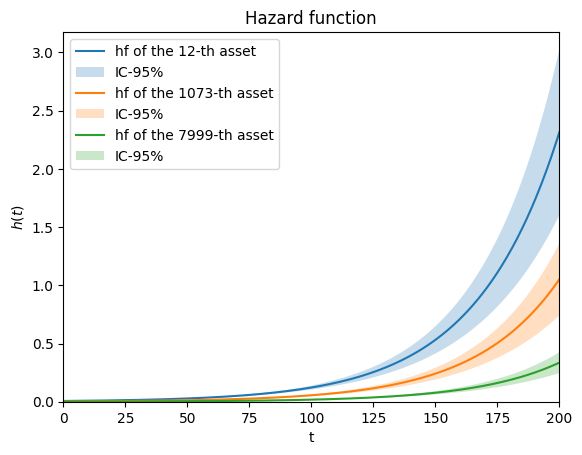

In [7]:
import matplotlib.pyplot as plt

i, j, k = 12, 1073, 7999

regression.plot.hf(covar[i], end_time=200, label=f"hf of the {i}-th asset")
regression.plot.hf(covar[j], end_time=200, label=f"hf of the {j}-th asset")
regression.plot.hf(covar[k], end_time=200, label=f"hf of the {k}-th asset")
plt.show()